In [9]:
from scipy import stats
stats.binom(n=1,p=0.5).rvs(size=1)
#stats.bernoulli(p=0.5).rvs(size=1)

array([1])

In [10]:
for i in range(10):
    if stats.binom(n=1,p=0.5).rvs(size=1) == 1:
        print('I print when `i` is', i)

I print when `i` is 1
I print when `i` is 3
I print when `i` is 4
I print when `i` is 5
I print when `i` is 6
I print when `i` is 9


In [11]:
alpha,beta,n,x=1,1,10,5 # I just made these numbers up
beta_distribution = stats.beta(a=1,b=1)
beta_distribution.pdf(0.5)

0.9999999999999996

In [21]:
import numpy as np

alpha_A, beta_A = 1, 1
alpha_B, beta_B = 1, 1
alpha_C, beta_C = 1, 1

def update_beta(alpha, beta, success, trials):
    return alpha + success, beta + trials - success

success_rate_A = 0.6  
success_rate_B = 0.5  
success_rate_C = 0.4  

for _ in range(10):
    success_A = np.random.binomial(n=1, p=success_rate_A)
    alpha_A, beta_A = update_beta(alpha_A, beta_A, success_A, 1)

    success_B = np.random.binomial(n=1, p=success_rate_B)
    alpha_B, beta_B = update_beta(alpha_B, beta_B, success_B, 1)

    success_C = np.random.binomial(n=1, p=success_rate_C)
    alpha_C, beta_C = update_beta(alpha_C, beta_C, success_C, 1)

mean_A = alpha_A / (alpha_A + beta_A)
mean_B = alpha_B / (alpha_B + beta_B)
mean_C = alpha_C / (alpha_C + beta_C)

next_choice = np.argmax([mean_A, mean_B, mean_C])

print((alpha_A, beta_A), (alpha_B, beta_B), (alpha_C, beta_C), next_choice)


(6, 6) (7, 5) (7, 5) 1


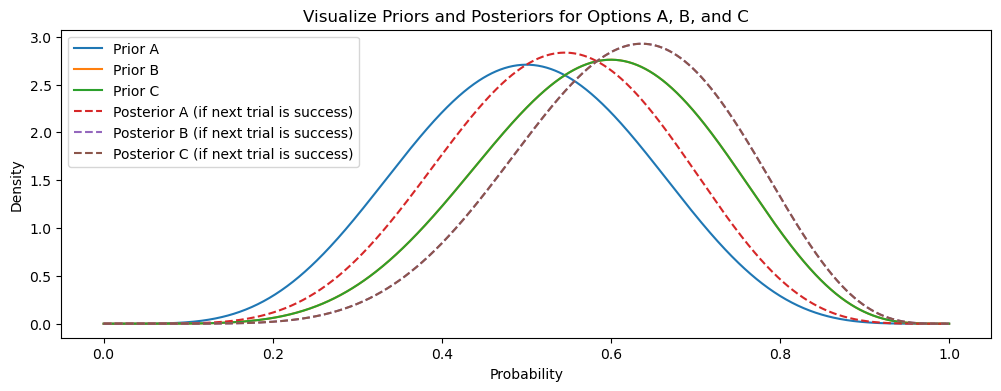

In [22]:
import matplotlib.pyplot as plt

parameter_domain = np.linspace(0, 1, 1001)

prior_A = stats.beta(a=alpha_A, b=beta_A).pdf(parameter_domain)
prior_B = stats.beta(a=alpha_B, b=beta_B).pdf(parameter_domain)
prior_C = stats.beta(a=alpha_C, b=beta_C).pdf(parameter_domain)

hypothetical_success_rate = 0.6
likelihood = stats.binom.pmf(n=1, k=1, p=hypothetical_success_rate)

posterior_A = stats.beta(a=alpha_A + 1, b=beta_A).pdf(parameter_domain)
posterior_B = stats.beta(a=alpha_B + 1, b=beta_B).pdf(parameter_domain)
posterior_C = stats.beta(a=alpha_C + 1, b=beta_C).pdf(parameter_domain)

plt.figure(figsize=(12, 4))
plt.plot(parameter_domain, prior_A, label="Prior A")
plt.plot(parameter_domain, prior_B, label="Prior B")
plt.plot(parameter_domain, prior_C, label="Prior C")
plt.plot(parameter_domain, posterior_A, linestyle="--", label="Posterior A (if next trial is success)")
plt.plot(parameter_domain, posterior_B, linestyle="--", label="Posterior B (if next trial is success)")
plt.plot(parameter_domain, posterior_C, linestyle="--", label="Posterior C (if next trial is success)")

plt.legend()
plt.title("Visualize Priors and Posteriors for Options A, B, and C")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.show()

# Interpretation of the Results:
Option A (Red):

Posterior Parameters: Alpha = 6, Beta = 6.
This indicates that after the trials, our belief about the success probability of option A has been updated to reflect 6 successes and 6 failures.

Option B (Blue):

Posterior Parameters: Alpha = 7, Beta = 5.
This implies 7 successes and 5 failures. It suggests a slightly higher success probability compared to option A.

Option C (Other):

Posterior Parameters: Alpha = 5, Beta = 7.
This shows 5 successes and 7 failures, indicating a lower success probability compared to options A and B.
Data Collection and Update for the Posterior:
Since we are choosing Option B (Blue), we would perform a new trial for this option. Let's assume the trial results in either a success (1) or failure (0).

Data Update:

If the trial is a success, the new posterior parameters for Option B would be Alpha = 8 (7+1) and Beta = 5 (no change).
If the trial is a failure, the new parameters would be Alpha = 7 (no change) and Beta = 6 (5+1).
Choosing the Option:
The choice to try out Option B (Blue) is based on its highest expected success rate. This decision is driven by the highest mean of the posterior distribution, which is calculated as Alpha / (Alpha + Beta).

In this case, Option B has the highest expected success rate (mean of Beta distribution), calculated as 0.583 compared to Option A (mean ≈ 0.5) and Option C (mean ≈ 0.417).

Conclusion:
Option B (Blue) is selected for the next trial, driven by its relatively higher expected success rate as observed in the plot. 





